## EDA(Extrapolatory Data Analysis):


#### Capstone Project 1: Inferential Statistics

In this section, I present an analysis of data using inferntial statistics. I will test the statistical significance of various observations. For all statistical analysis, we set level of signifiance to be 5%.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
from scipy import stats

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification


# pre-processing:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from IPython.display import Markdown, display
import os
import statistics


In [3]:
data_original=pd.read_csv('data_original.csv',index_col=0)

In [4]:
data_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,6.238137,0.155797,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,6.281853,0.172096,2.181467


In [5]:
data_wrangled=pd.read_csv('data_wrangled.csv',index_col=0)

In [6]:
data_wrangled.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,0.982143,-0.974429,2.344766,2.129631,0.628559,-1.088291,-0.049597,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,-0.607019,0.861439,2.332238,1.314156,0.327041,-0.936892,-0.092512,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.856182,-0.820777,1.782699,1.258693,1.155620,-1.369108,-0.025843,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.856182,-0.766028,0.932968,1.165100,0.156966,-0.465514,-0.050329,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.856182,-0.759847,-0.012881,1.172900,0.344711,-0.668831,-0.085616,-0.681889,-0.015566,2.830742,-0.384466


In [7]:
data_featured=pd.read_csv('data_featured.csv',index_col=0)

In [8]:
data_featured.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,0.982143,-0.974429,2.344766,2.129631,0.628559,-1.088291,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,-0.607019,0.861439,2.332238,1.314156,0.327041,-0.936892,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.856182,-0.820777,1.782699,1.258693,1.155620,-1.369108,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.856182,-0.766028,0.932968,1.165100,0.156966,-0.465514,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.856182,-0.759847,-0.012881,1.172900,0.344711,-0.668831,-0.681889,-0.015566,2.830742,-0.384466


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211665E2C18>,
      dtype=object)

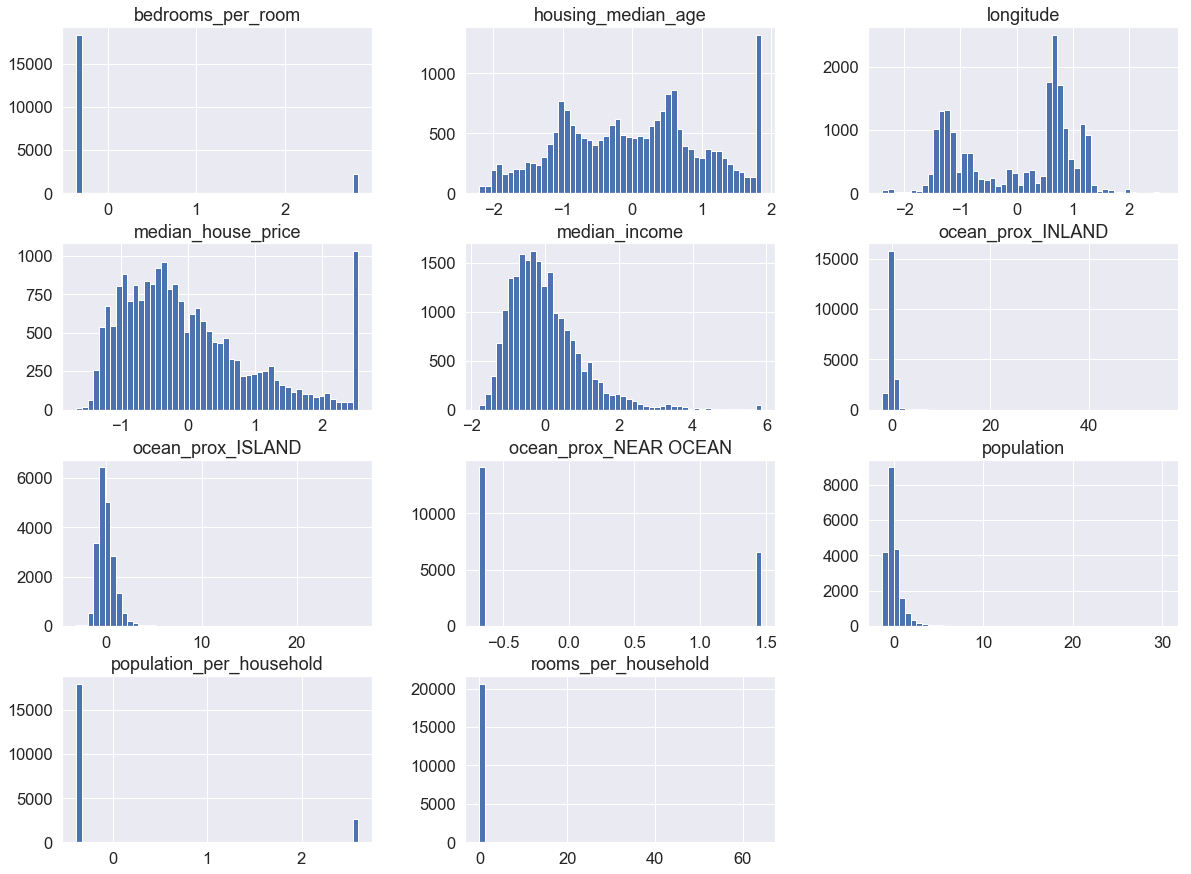

In [9]:
data_featured.hist(bins=50,figsize=(20,15))

In most of the above histograms, we see the skewed right shape of the distributions of features, indicates the more outliars to the right(positive direction) .Housing median age is a kind of a bimodal symmetrical but it has also a high peak at the end, where as median_house_price is right skewed with a high peak at the end.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


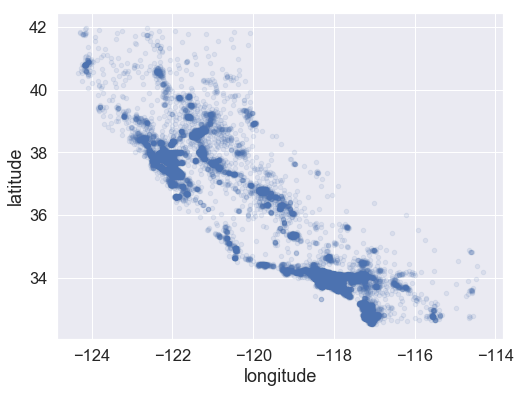

In [10]:
# Lets see the distribution of households in the variation of longitude and lattitude.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Pandas scatter plot
data_original.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

We can see the high density of household distribution nearby the sea area except in North Coast of California.

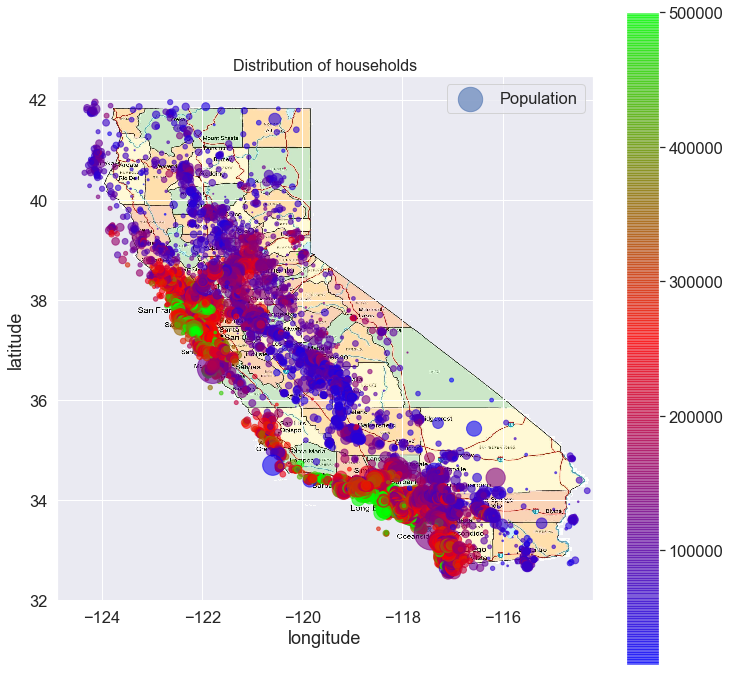

In [11]:
plt.figure(figsize=(12,12))
img=plt.imread('C://Users//disoj//Desktop//california_map.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data_original['longitude'],y=data_original['latitude'],alpha=0.6,s=data_original['population']/30,c=data_original['median_house_value'],
            cmap=plt.get_cmap("brg"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()

Following insights can be taken from above distribution plot :
#### Housing prices depends on the location and population density.
#### Housing prices near ocean are higher besides in northern california.

In [12]:
corr_matrix=data_featured.corr()
corr_matrix['median_house_price'].sort_values(ascending=False)

median_house_price          1.000000
median_income               0.688075
bedrooms_per_room           0.160284
ocean_prox_INLAND           0.151948
population_per_household    0.141862
housing_median_age          0.105623
rooms_per_household         0.023416
population                 -0.024650
longitude                  -0.045967
ocean_prox_ISLAND          -0.247152
ocean_prox_NEAR OCEAN      -0.484859
Name: median_house_price, dtype: float64

We can see that the top 5 features are the most correlated features with the target "median_house_price"
Let's visualise these correlations in a heat map.

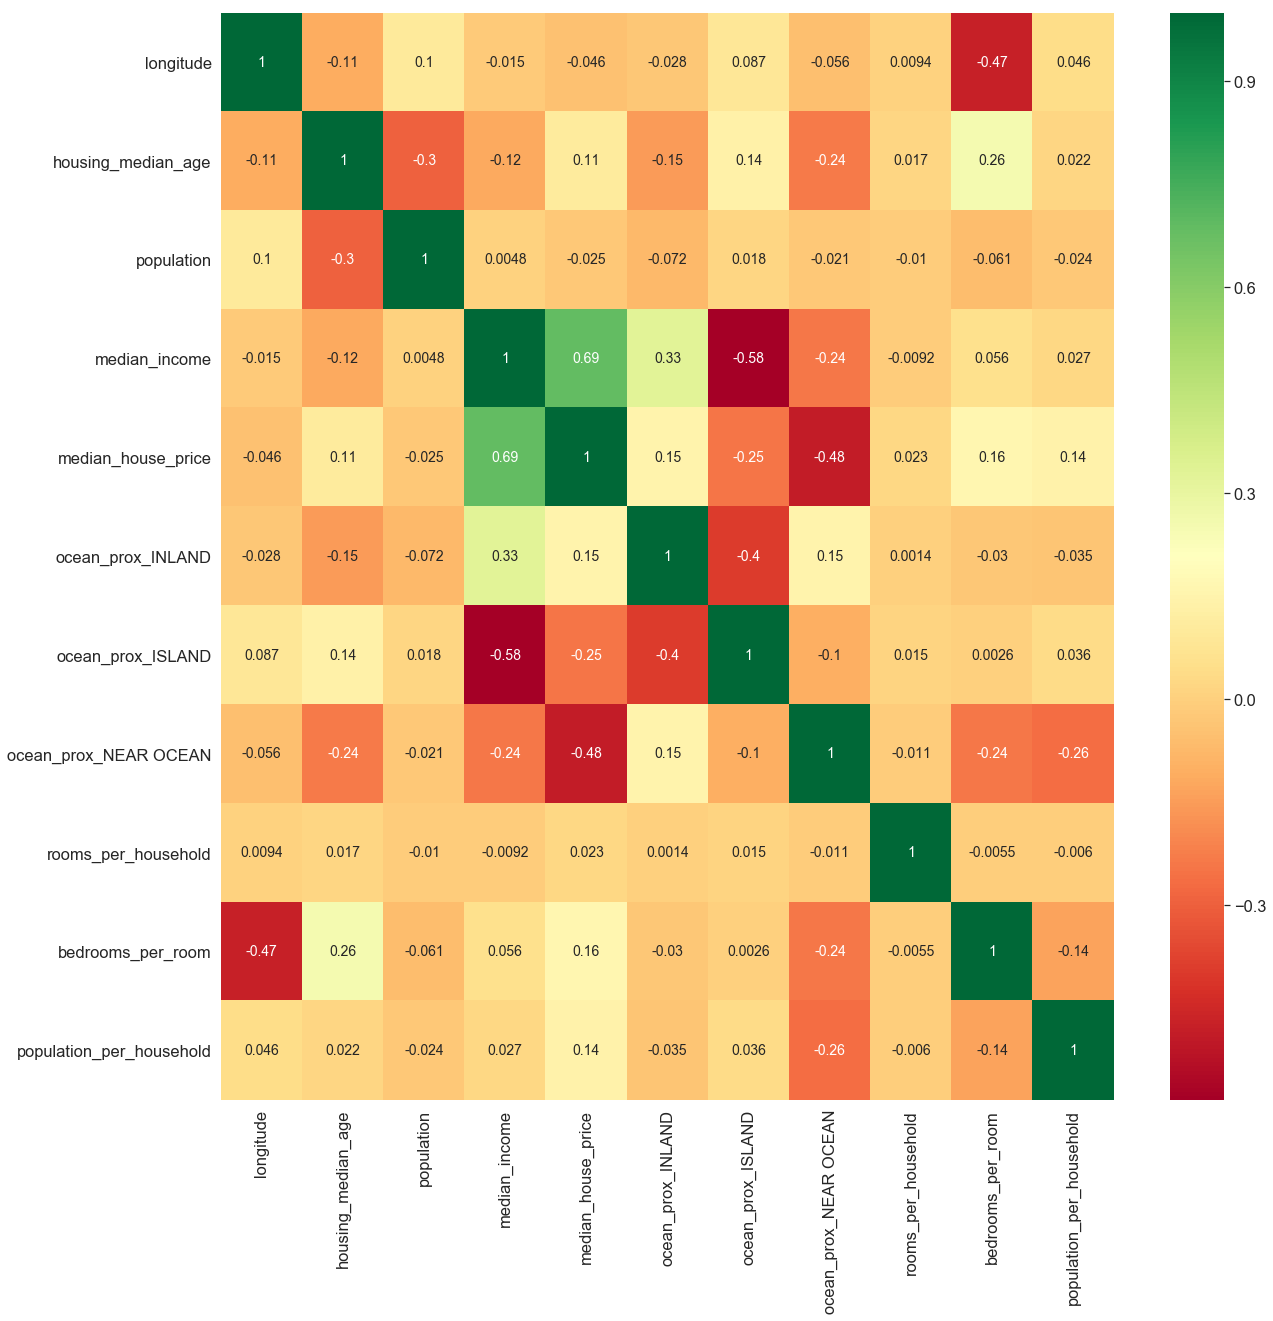

In [13]:
# Lets see the correlation of features with response.
# Generating the correlation heat-map
corrmat=data_featured.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap( data_featured[top_corr_features].corr(),annot=True,cmap="RdYlGn");

C:\Users\disoj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


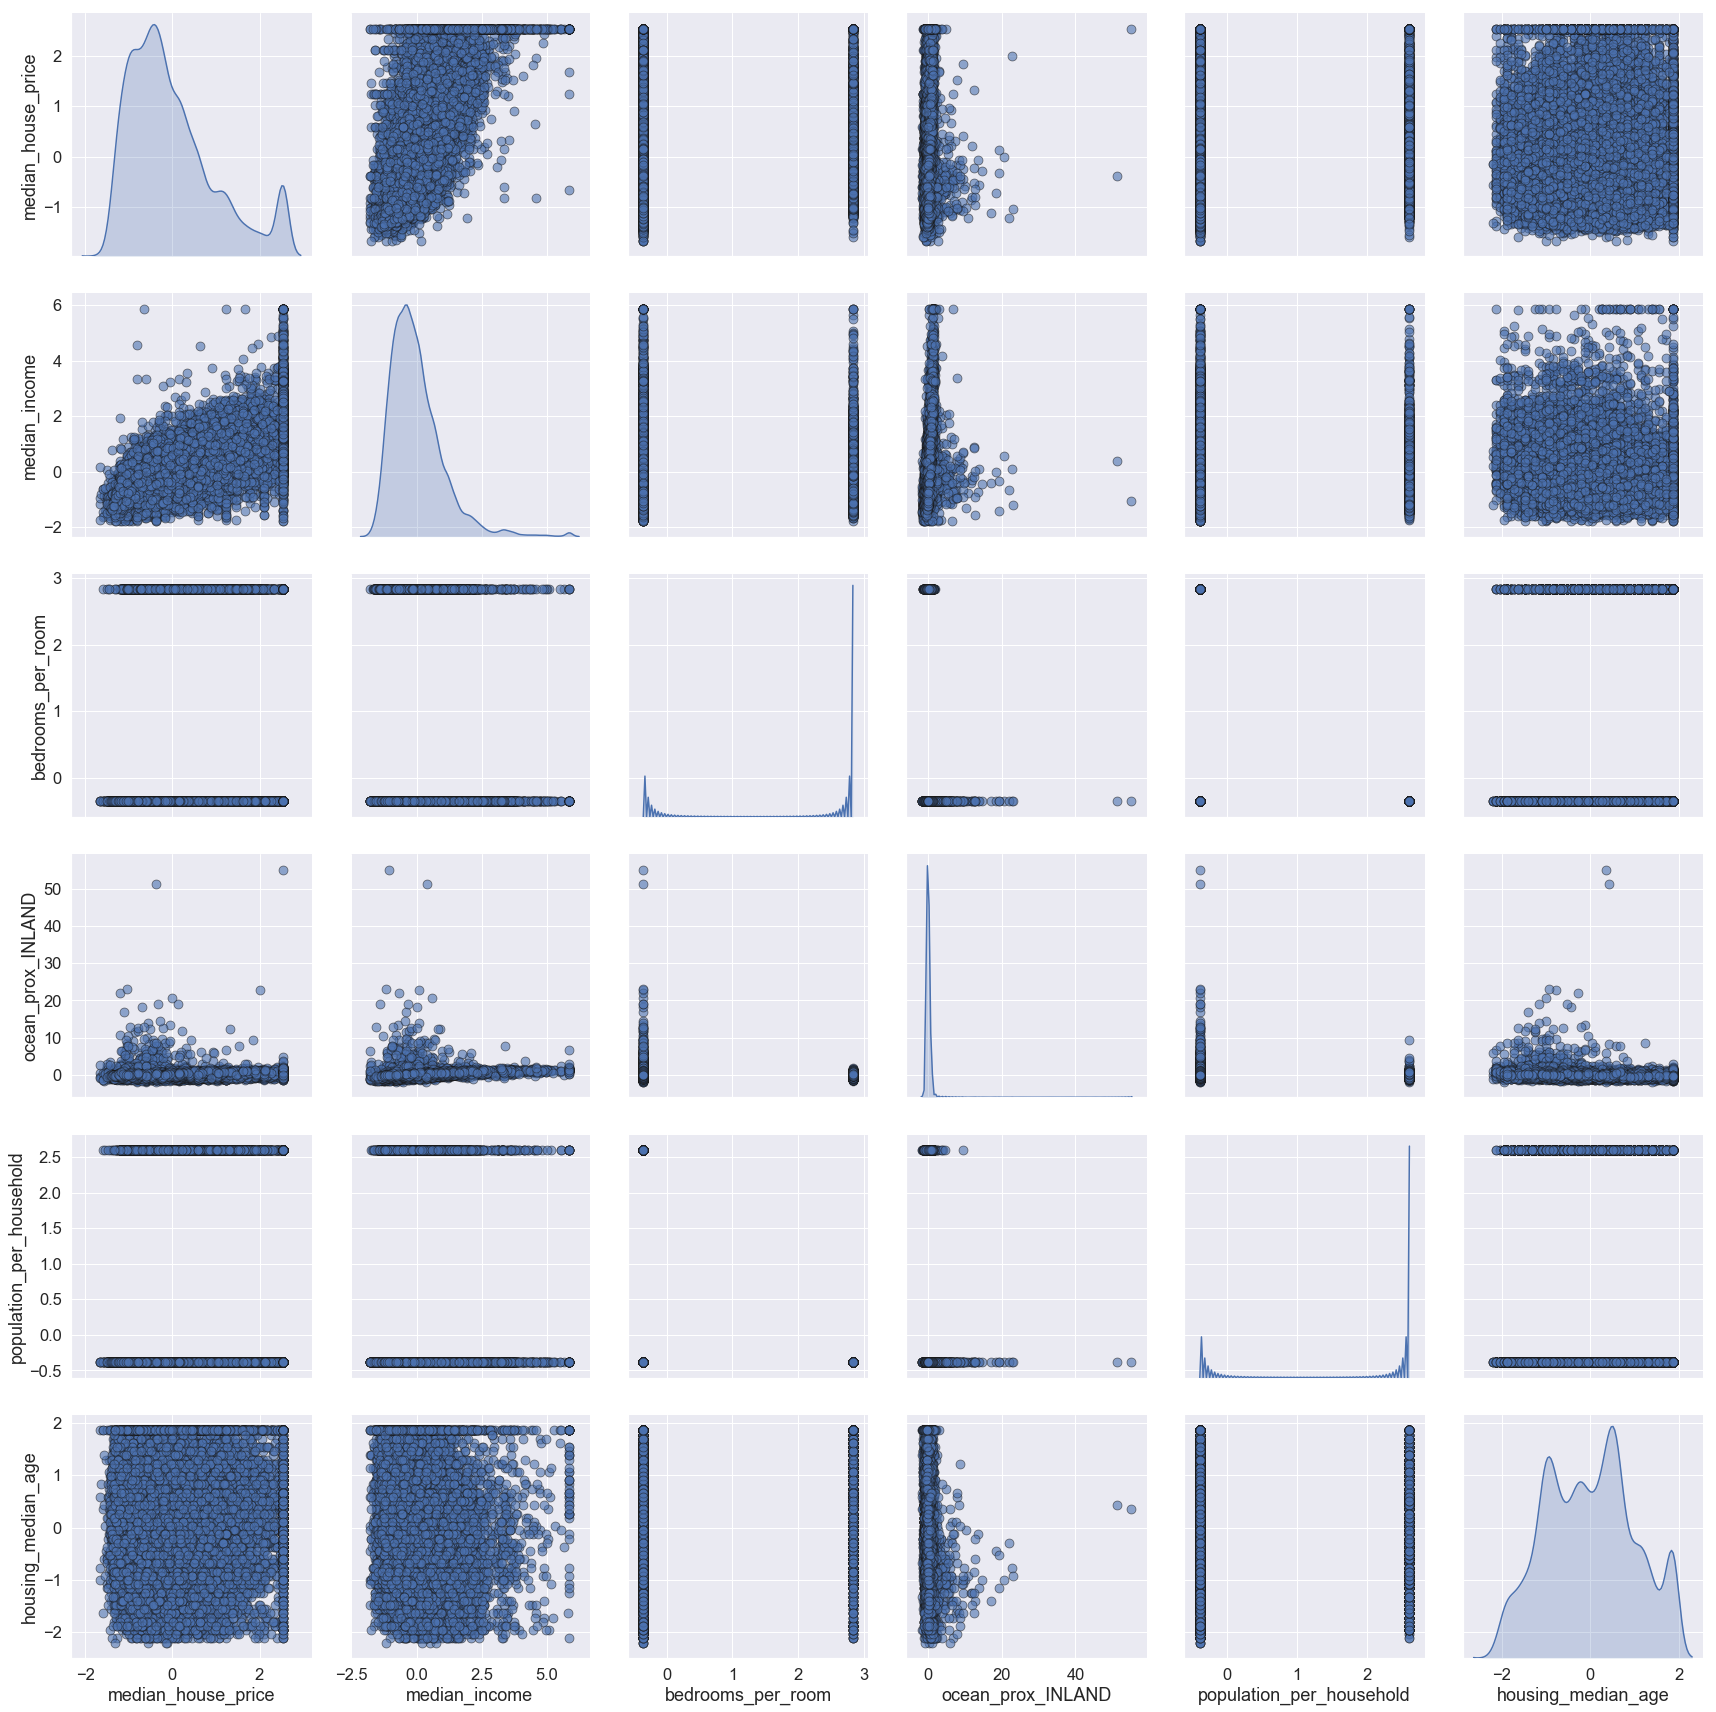

In [14]:
# Lets see the visualization of the relationship between the most correlated features and the response using scatterplots
sns.pairplot(data_featured[['median_house_price','median_income','bedrooms_per_room','ocean_prox_INLAND','population_per_household','housing_median_age']],diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},size=4) 

From above distributions, we can say that the'median_income' is the best regressor for the target value 'median_house_price'.

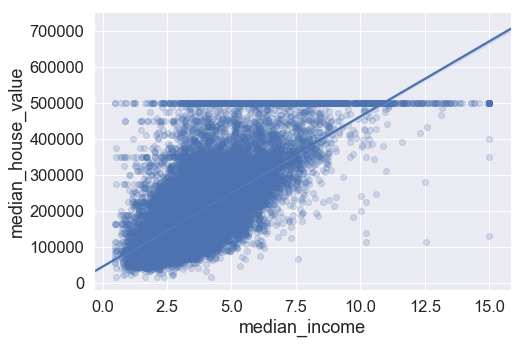

In [15]:
# Seaborn scatter plot with regression line
sns.lmplot(x='median_income', y='median_house_value', data=data_original, aspect=1.5, scatter_kws={'alpha':0.2})

Few  outliers are seen in the distribution of median_house_price with median_income due to the presence of few lines at around 500k, 450k, and 350k. This kind of data may degrade the performance of model.

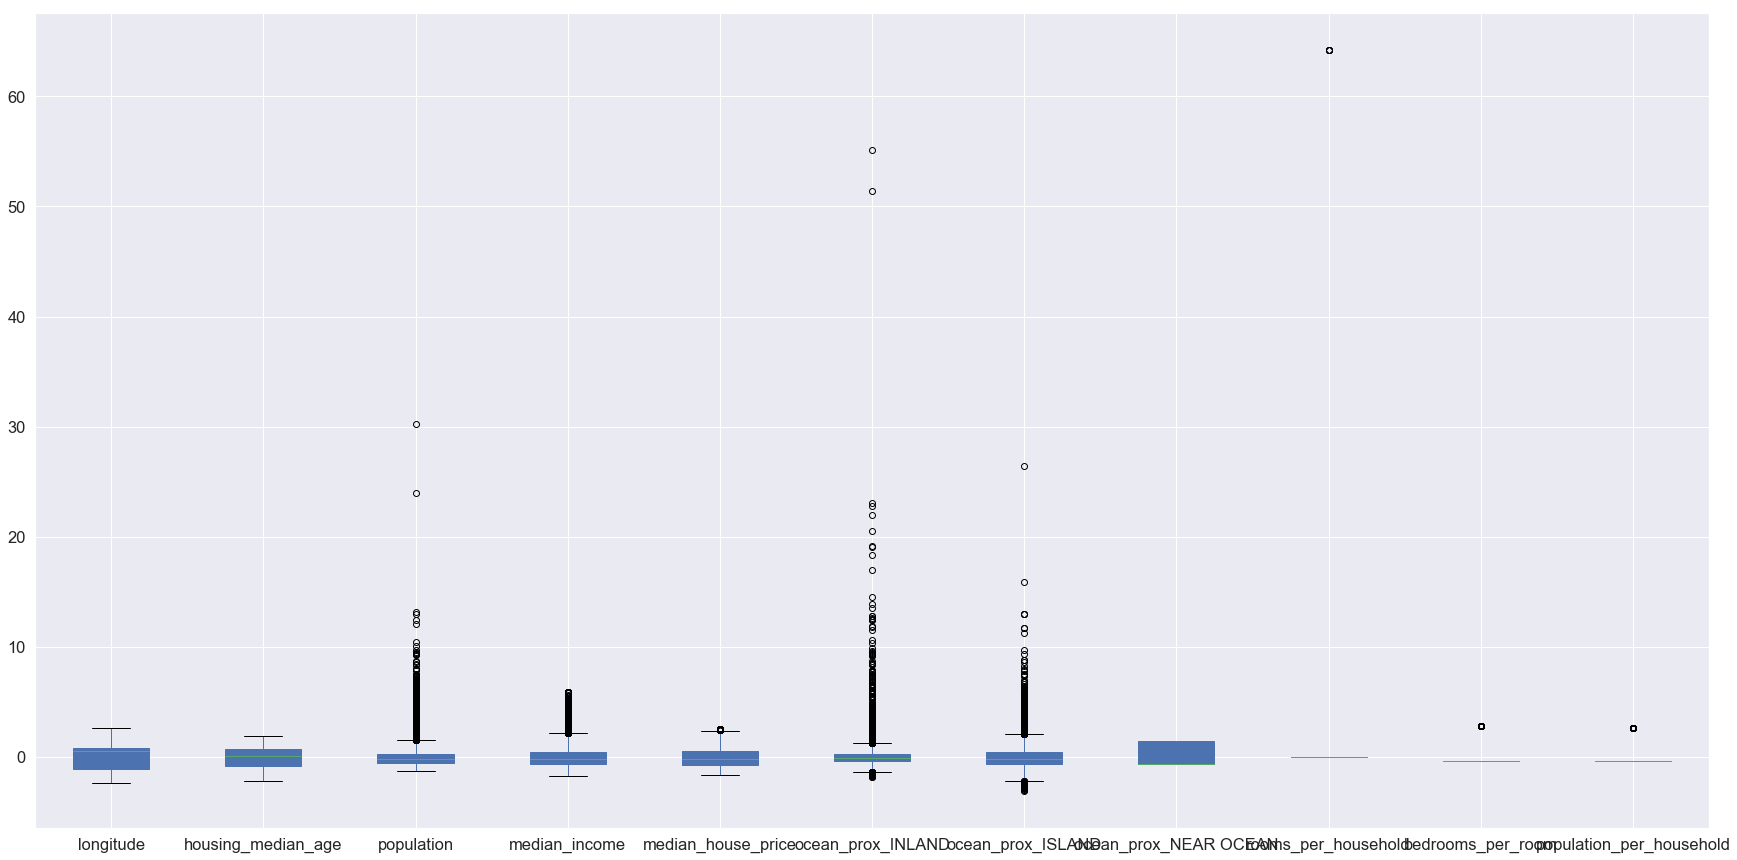

In [16]:
#Checking Outliers: 
plt.figure(figsize=(30,15))
boxplot=data_featured.boxplot(patch_artist=True)

In [17]:
data_featured.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,0.982143,-0.974429,2.344766,2.129631,0.628559,-1.088291,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,-0.607019,0.861439,2.332238,1.314156,0.327041,-0.936892,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.856182,-0.820777,1.782699,1.258693,1.155620,-1.369108,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.856182,-0.766028,0.932968,1.165100,0.156966,-0.465514,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.856182,-0.759847,-0.012881,1.172900,0.344711,-0.668831,-0.681889,-0.015566,2.830742,-0.384466


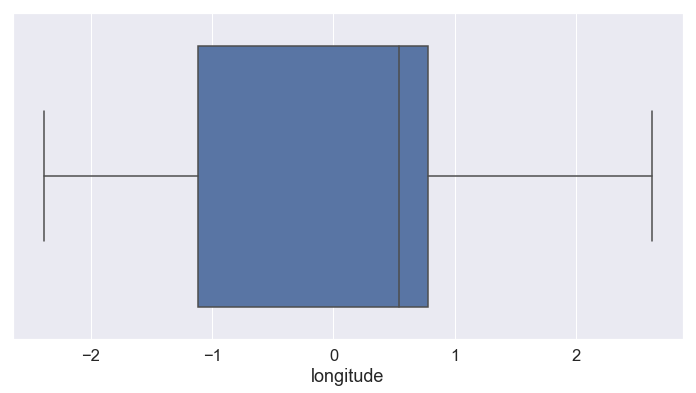

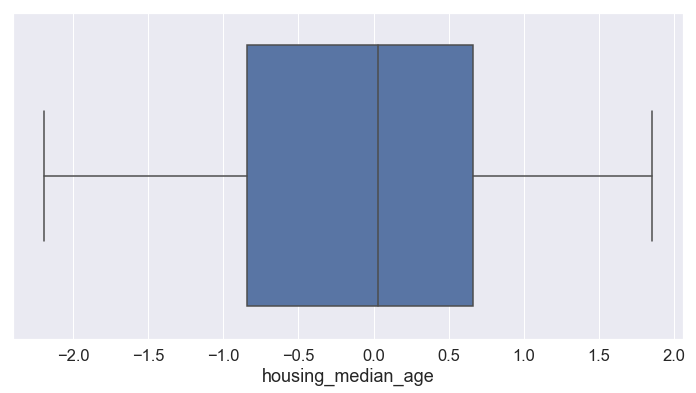

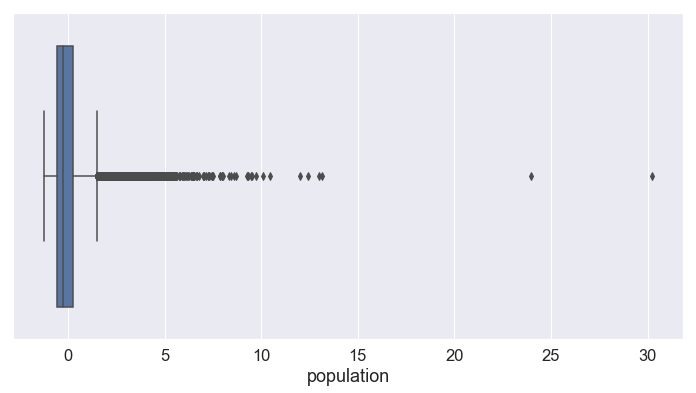

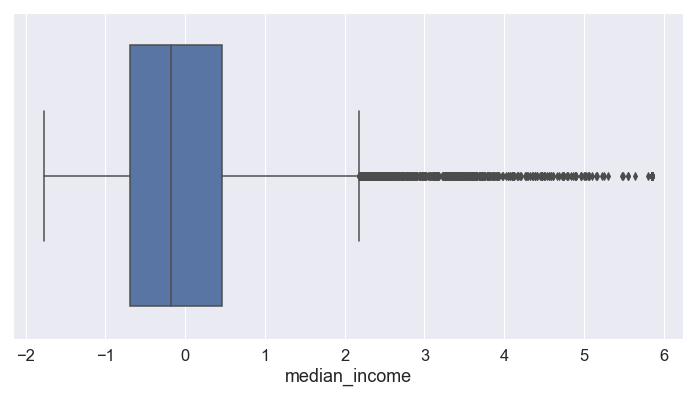

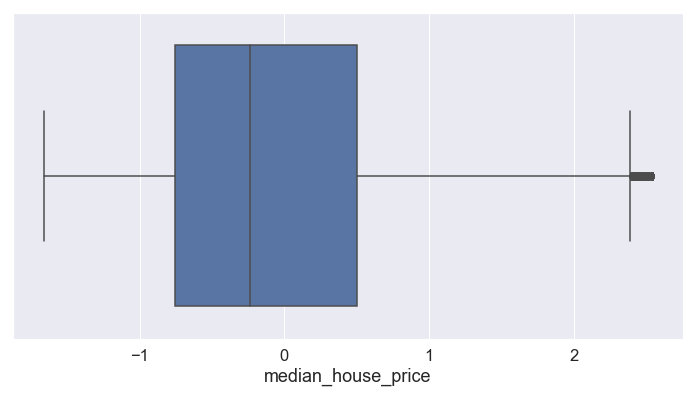

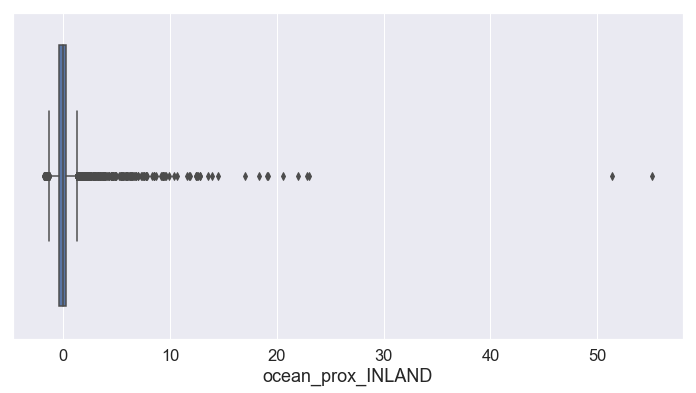

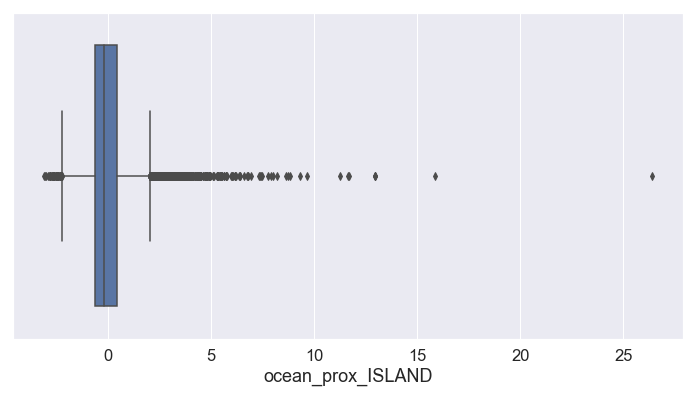

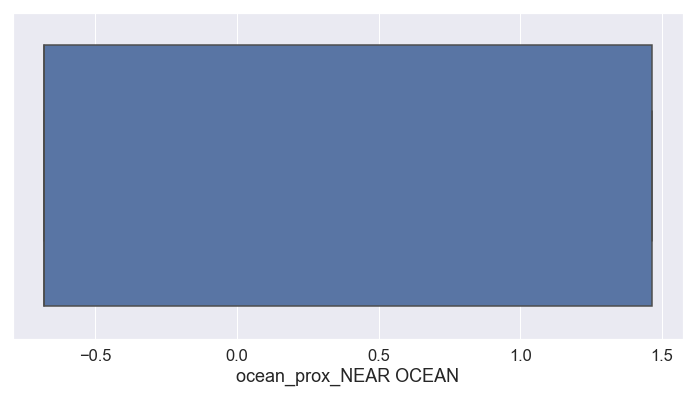

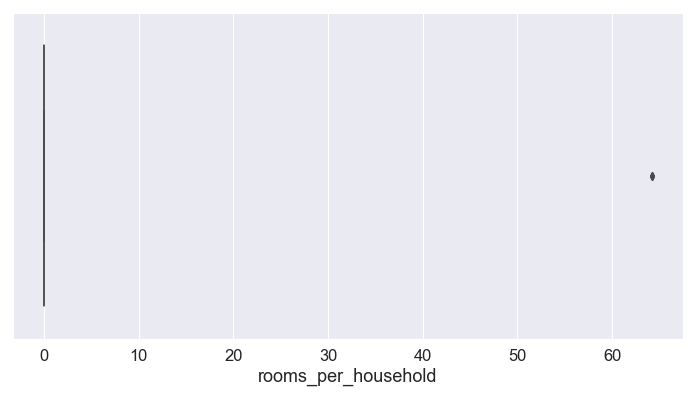

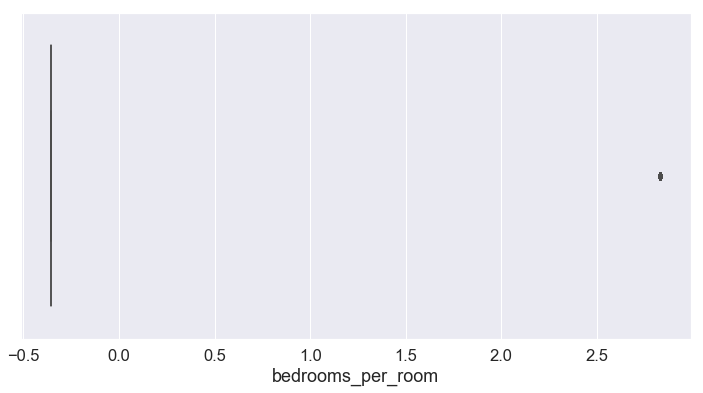

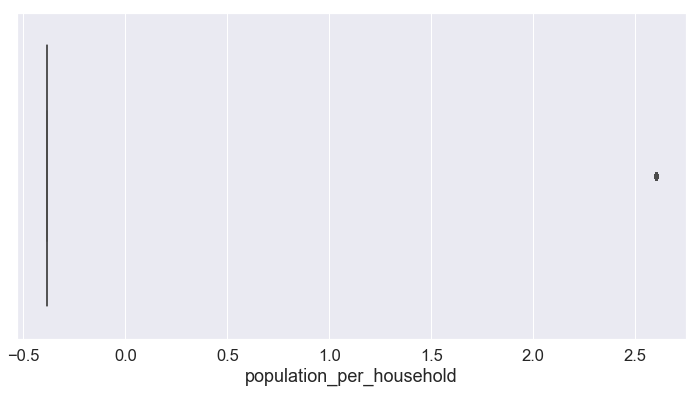

In [18]:
num_features=['longitude', 'housing_median_age','population', 'median_income',
       'median_house_price', 'ocean_prox_INLAND', 'ocean_prox_ISLAND','ocean_prox_NEAR OCEAN', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data_featured,ax=ax)
    
    

#### Presence of many outliers may degrade the model performance, so I am first using IQR method to remove such outliers.

### Detecting and Removing Outliers:

In [19]:
# Calculation of IQR:
Q1=data_featured.quantile(0.25)
Q3=data_featured.quantile(0.75)
IQR=Q3-Q1
print(IQR)

longitude                   1.891705
housing_median_age          1.509703
population                  0.828304
median_income               1.147425
median_house_price          1.257661
ocean_prox_INLAND           0.651411
ocean_prox_ISLAND           1.064188
ocean_prox_NEAR OCEAN       2.148403
rooms_per_household         0.000000
bedrooms_per_room           0.000000
population_per_household    0.000000
dtype: float64


In [20]:
# IQR for 'median_income' and other features detecting outliers with IQR, TRUE=outliers, FALSE=valid data
print(data_featured<(Q1-1.5*IQR))
(data_featured>(Q3+1.5*IQR))

       longitude  housing_median_age  population  median_income  \
0          False               False       False          False   
1          False               False       False          False   
2          False               False       False          False   
3          False               False       False          False   
4          False               False       False          False   
...          ...                 ...         ...            ...   
20635      False               False       False          False   
20636      False               False       False          False   
20637      False               False       False          False   
20638      False               False       False          False   
20639      False               False       False          False   

       median_house_price  ocean_prox_INLAND  ocean_prox_ISLAND  \
0                   False              False              False   
1                   False              False              Fal

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,False,False,False,True,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# Removing Outliers:
data_OLR = data_featured[~((data_featured < (Q1 - 1.5 * IQR)) |(data_featured > (Q3 + 1.5 * IQR))).any(axis=1)]
data_OLR.shape

(13236, 11)

In [22]:
data_OLR.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
701,-1.198061,0.267020,-0.830491,1.151046,1.942445,0.838250,-1.012356,-0.681889,-0.015566,-0.353264,-0.384466
830,-1.208044,-1.560516,0.808456,0.408011,0.087910,-0.086579,-0.309506,-0.681889,-0.015566,-0.353264,-0.384466
859,-1.198061,-0.607019,0.659220,0.391588,0.353091,0.029978,-0.533384,-0.681889,-0.015566,-0.353264,-0.384466
860,-1.193070,-1.083767,0.310414,0.973025,0.664202,0.390584,-0.752754,-0.681889,-0.015566,-0.353264,-0.384466
861,-1.203053,-0.686477,0.577096,-0.098681,0.087043,-0.483893,0.610403,-0.681889,-0.015566,-0.353264,-0.384466


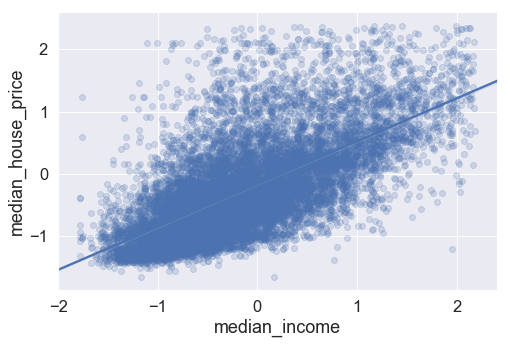

In [23]:
# Seaborn scatter plot with regression line after removing outliers:
sns.lmplot(x='median_income', y='median_house_price', data=data_OLR, aspect=1.5, scatter_kws={'alpha':0.2})

Outliers due to the presence of lines are removed now; however, there are still few outliers are present. 
The presence of these outliers may be due to the skewed distribution of the data.I will try to remove these outliers as
well by transforming the data using log1p and boxcox1p functions. boxcox1p can be used for highly skewed features.  

Lets see the visulisations and skewed values again after removing outliers:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021176E730F0>,
      dtype=object)

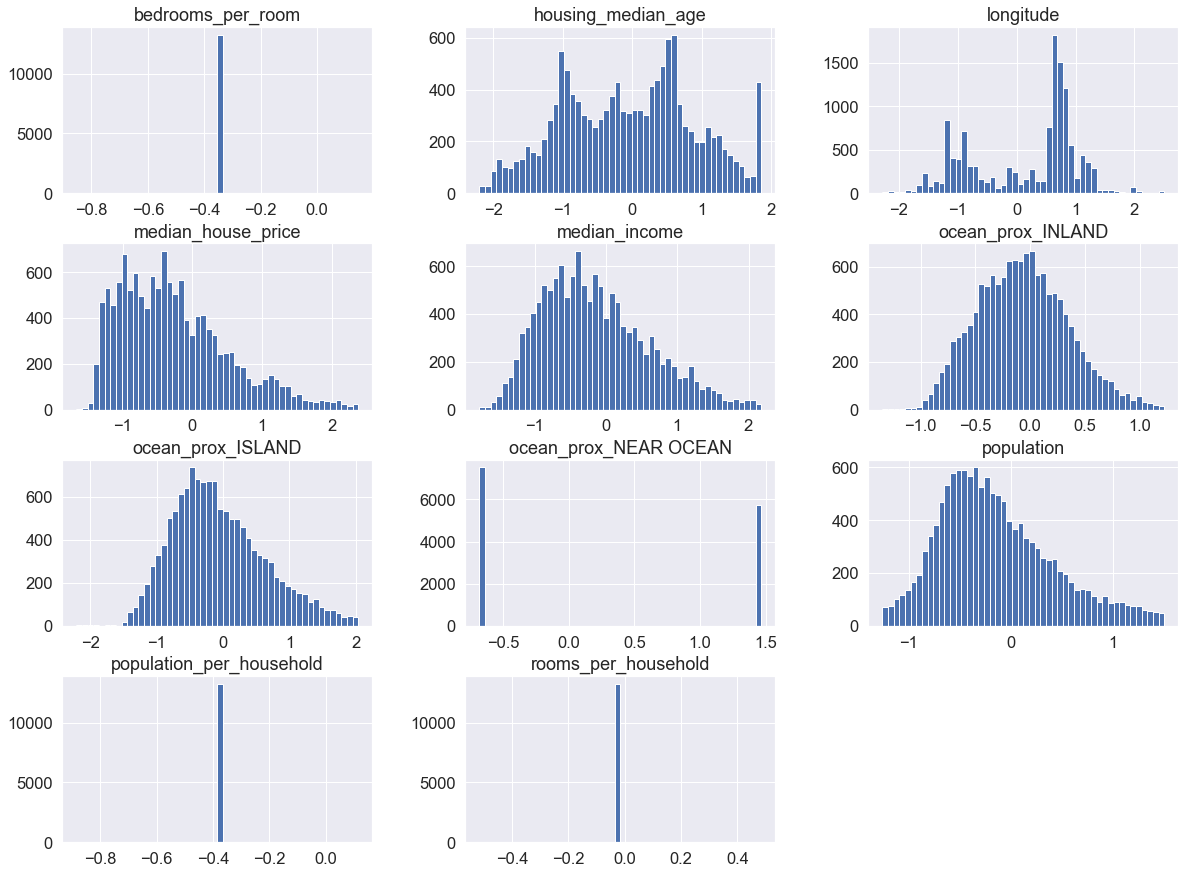

In [24]:
data_OLR.hist(bins=50,figsize=(20,15))

In [25]:
#### Selected featured lists based on VIF and p-values:
features_selected=['longitude','housing_median_age','population','median_income','ocean_prox_INLAND','ocean_prox_ISLAND','ocean_prox_NEAR OCEAN','rooms_per_household','bedrooms_per_room','population_per_household']

In [26]:
features_selected

['longitude',
 'housing_median_age',
 'population',
 'median_income',
 'ocean_prox_INLAND',
 'ocean_prox_ISLAND',
 'ocean_prox_NEAR OCEAN',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

#### Skewness of Features:

In [27]:
skewness=[]
for i in features_selected:
    skewness.append(data_OLR[i].skew())
pd.DataFrame(data=skewness,index=features_selected,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
population,0.659904
median_income,0.583513
ocean_prox_ISLAND,0.537888
ocean_prox_NEAR OCEAN,0.270528
ocean_prox_INLAND,0.258783
housing_median_age,0.036557
rooms_per_household,0.000000
bedrooms_per_room,0.000000
population_per_household,0.000000
longitude,-0.492912


There are no high values of skewness of features, so I am not using any transform here(such as log1p). 

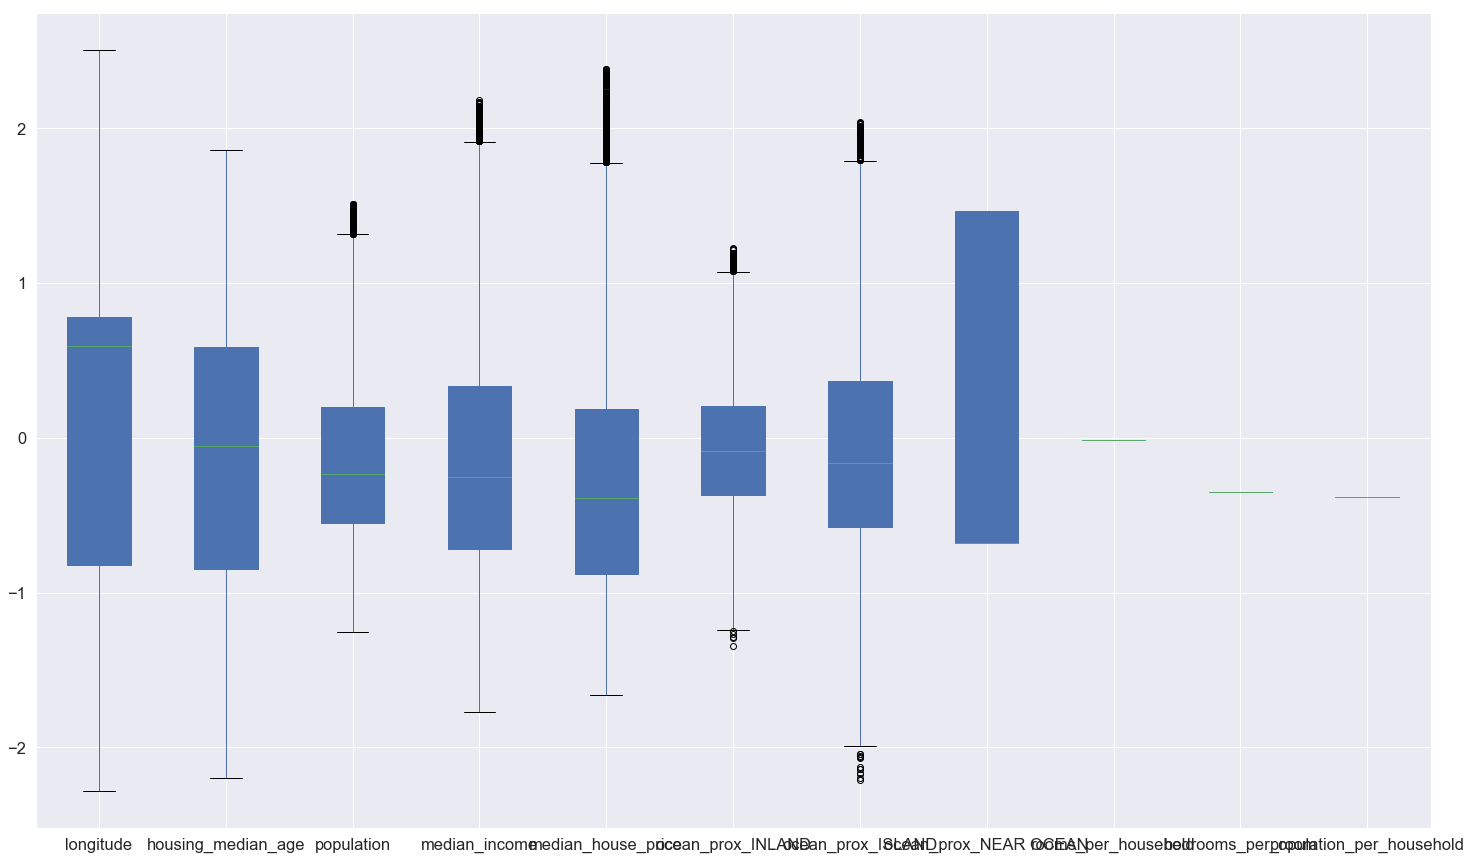

In [28]:
#Checking Outliers: 
plt.figure(figsize=(25,15))
boxplot=data_OLR.boxplot(patch_artist=True)

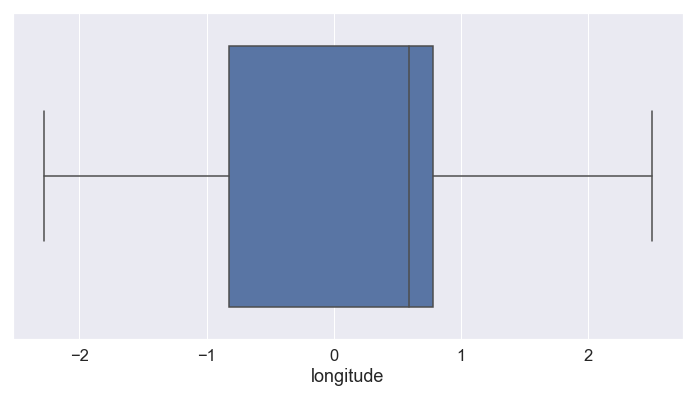

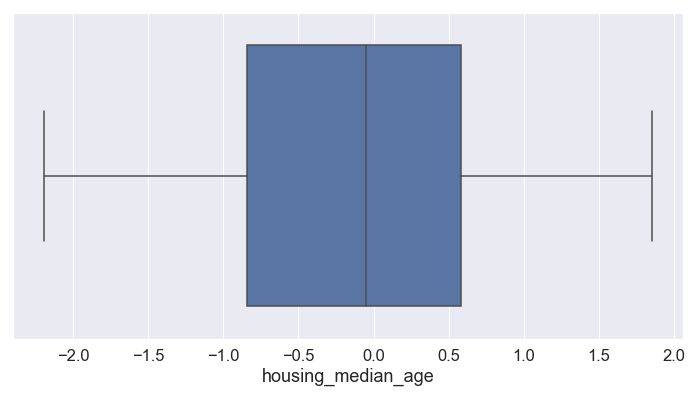

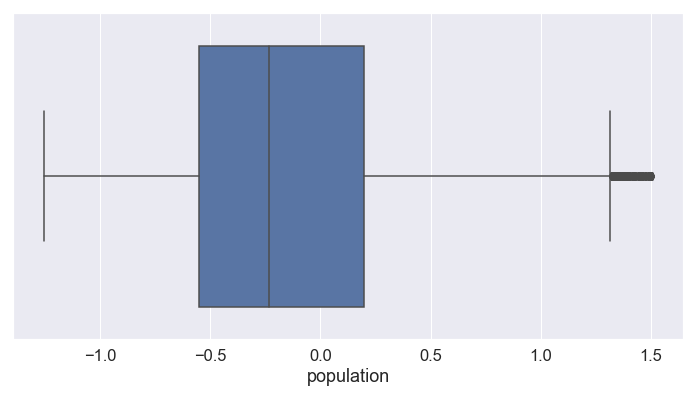

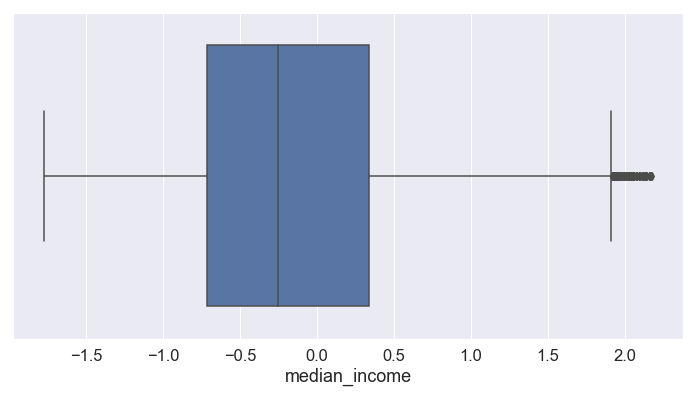

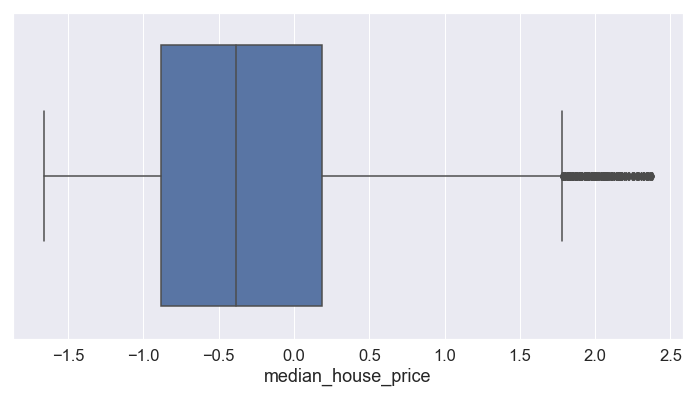

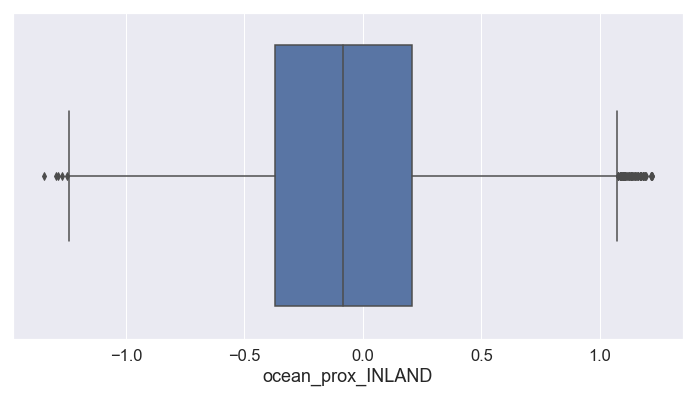

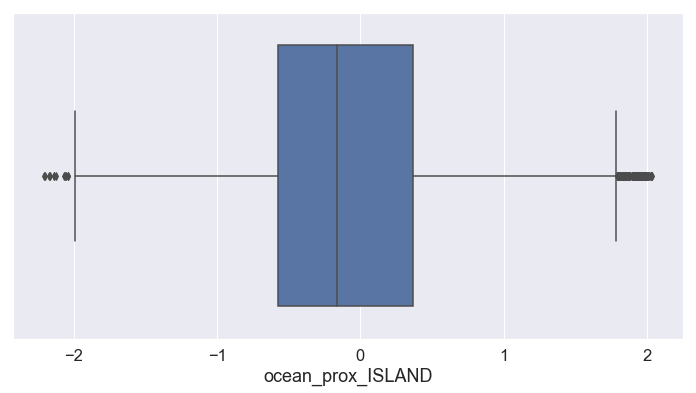

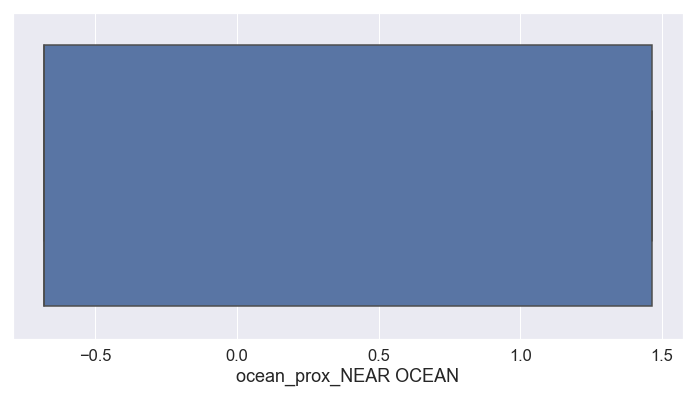

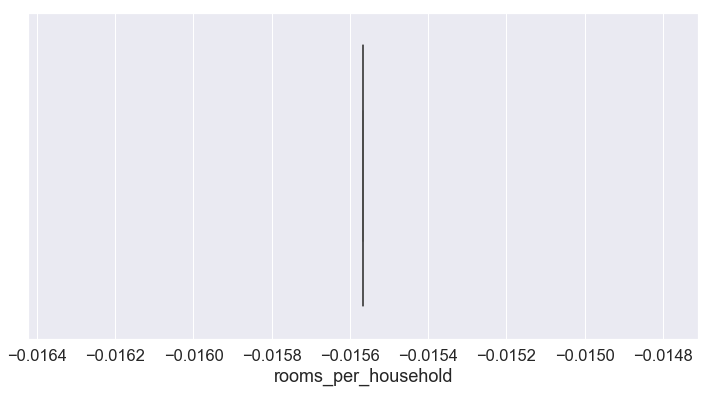

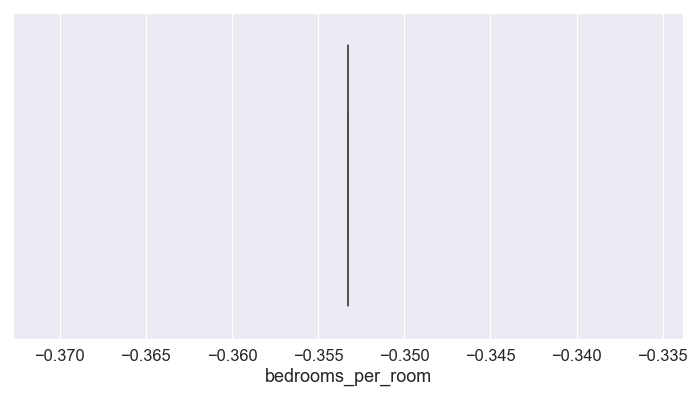

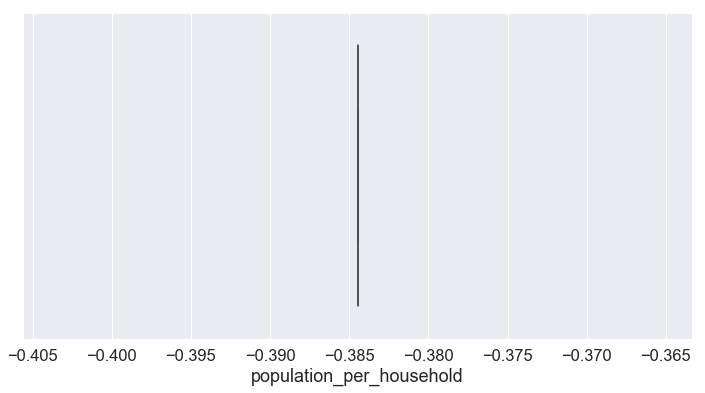

In [29]:
num_features1=['longitude', 'housing_median_age','population', 'median_income',
       'median_house_price', 'ocean_prox_INLAND', 'ocean_prox_ISLAND','ocean_prox_NEAR OCEAN', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
for i in num_features1:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data_OLR,ax=ax)

In [31]:
# Save dataframe as CSV
data_OLR.to_csv('data_prepared.csv', columns = data_OLR.columns)